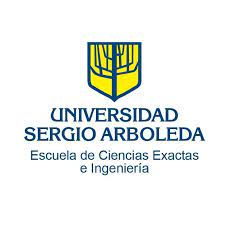

*Programa de Ciencias de la Computación e Inteligencia Artificial*

*Autor*: Daniel Hilarion Rojas

*Fecha*: 23 de Mayo 2022

*Materia*: HPC

*Tema*: Parcial III

In [28]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from IPython.core.pylabtools import figsize
from sklearn.metrics import r2_score

In [29]:
# Import results in model RL on C++
costoCpp = pd.read_csv("/content/vectorCosto.txt", header=None)
thetaCpp = pd.read_csv("/content/vectorTheta.txt", header=None)
y_hatCpp = pd.read_csv("/content/Prediccion.txt", header=None)

costoCpp_test = pd.read_csv("/content/vectorCostoT.txt", header=None)
thetaCpp_test = pd.read_csv("/content/vectorThetaT.txt", header=None)
y_hatCpp_test = pd.read_csv("/content/PrediccionT.txt", header=None)

In [30]:
# Import dataset insurance
dfInsurance = pd.read_csv("/content/insuranceHPC.csv")
dfInsurance.head()

,charges,age,sex,bmi,children,smoker,region
0,16884.92400,19,0,27.900,0,0,0
1,1725.55230,18,1,33.770,1,1,1
2,4449.46200,28,1,33.000,3,1,1
3,21984.47061,33,1,22.705,0,1,2
4,3866.85520,32,1,28.880,0,1,2


In [31]:
# Exploratory data analysis
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   charges   1338 non-null   float64
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [32]:
# Look a resum for the dataset
dfInsurance.describe().T

,count,mean,std,min,25%,50%,75%,max
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.795217,0.403694,0.0000,1.00000,1.000,1.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000


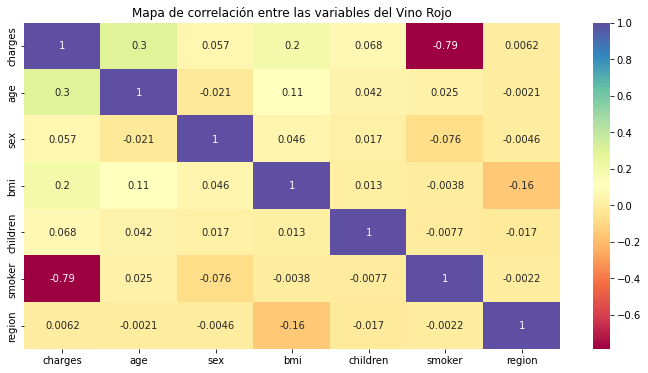

In [33]:
# Next, the correlation matrix is ​​presented: It represents
# the degree of affinity between the variables. If the factor is close to
# 1 or -1, represents a high affinity or relationship (directly or indirectly
# proportional)
mathCorr = dfInsurance.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(mathCorr, annot=True, cmap='Spectral')
plt.title('Mapa de correlación entre las variables del Vino Rojo')
plt.show()

In [34]:
# Given that correlation matrix, it is assumed that there is no inverse relationship
# proportional between the dependent and independent variables, therefore,
# it is evident that it presents a significantly low relationship.

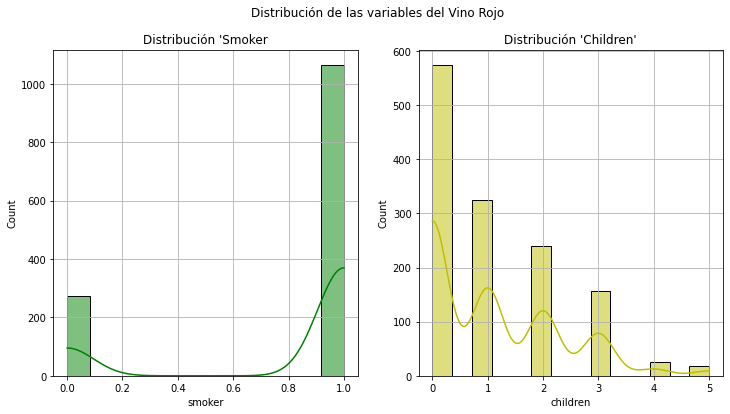

Text(0.5, 1.0, "Distribución 'Region'")

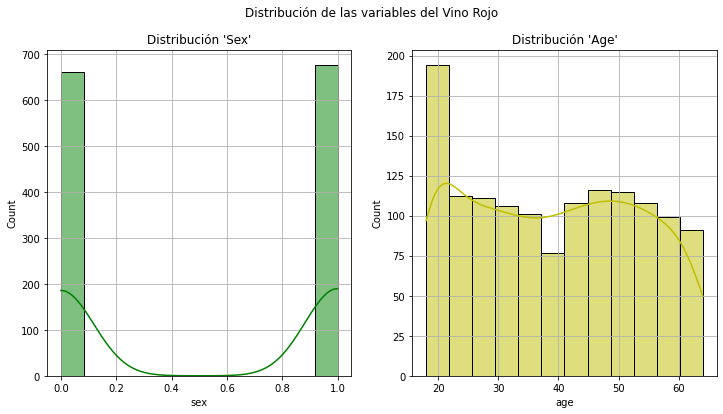

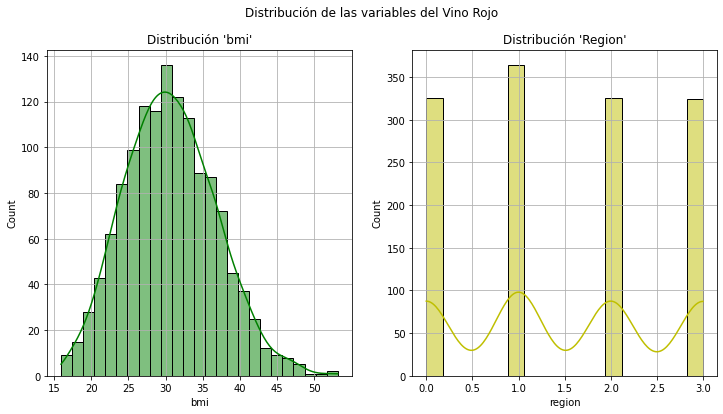

In [35]:
# 4.- Next, the distribution of the variables is presented
# (the distribution of all variables is expected to be Normal-Gaussian)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Distribución de las variables del Vino Rojo')
sns.histplot(dfInsurance['smoker'], kde=True, color='g', ax=axes[0])
sns.histplot(dfInsurance['children'], kde=True, color='y', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'Smoker")
axes[1].grid()
axes[1].set_title("Distribución 'Children'")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Distribución de las variables del Vino Rojo')
sns.histplot(dfInsurance['sex'], kde=True, color='g', ax=axes[0])
sns.histplot(dfInsurance['age'], kde=True, color='y', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'Sex'")
axes[1].grid()
axes[1].set_title("Distribución 'Age'")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Distribución de las variables del Vino Rojo')
sns.histplot(dfInsurance['bmi'], kde=True, color='g', ax=axes[0])
sns.histplot(dfInsurance['region'], kde=True, color='y', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'bmi'")
axes[1].grid()
axes[1].set_title("Distribución 'Region'")

In [36]:
# It can be seen that the variables have a Normal distribution

In [37]:
# It is separated into 2 groups: dependent and independent variables

In [38]:
X = dfInsurance.drop(['charges'], axis=1)
y = dfInsurance['charges']

In [39]:
# The dataset is divided into two groups, test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [40]:
# The Machine Learning model is selected: In a Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

In [41]:
# The data is trained
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [42]:
# Training prediction values ​​are taken
y_hat_SK = pipe.predict(X_train)
# Test values
y_test_hat_SK = pipe.predict(X_test)

In [43]:
# Vector of coefficients and cutoff point of the RL Model in SK
regression = LinearRegression().fit(X_train, y_train)
regression.coef_

array([   259.91583957,   -246.70965668,    334.50820583,    441.81651302,
       -23631.78924739,    437.18170076])

In [44]:
regression.intercept_

10522.093373556294

#Comparación SK vs C++

In [45]:
#Average
dfInsurance.mean()

charges     13270.422265
age            39.207025
sex             0.505232
bmi            30.663397
children        1.094918
smoker          0.795217
region          1.484305
dtype: float64

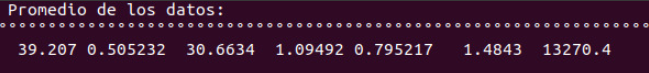

# Normalización

#SK


In [46]:
from sklearn import preprocessing
X_sc = preprocessing.scale(dfInsurance)
print(X_sc[1335])
print(X_sc[1336])
print(X_sc[1337])
print(X_sc[1337])

[-0.96159623 -1.50996545 -1.0105187   1.0148781  -0.90861367  0.5074631
 -0.43849455]
[-0.93036151 -1.29636188 -1.0105187  -0.79781341 -0.90861367  0.5074631
 -1.34390459]
[ 1.31105347  1.55168573 -1.0105187  -0.26138796 -0.90861367 -1.97058663
  0.46691549]
[ 1.31105347  1.55168573 -1.0105187  -0.26138796 -0.90861367 -1.97058663
  0.46691549]


#C++

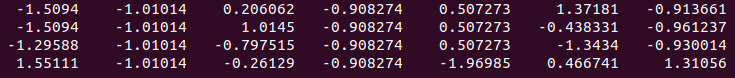

#TRAIN

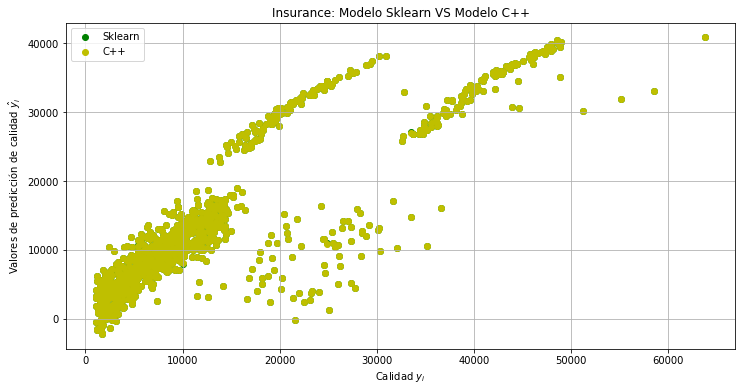

In [47]:
# The graphs of predictions between the C++ model and
# the Sklearn model
fig, axes = plt.subplots(figsize=(12, 6))
plt.scatter(y_train, y_hat_SK, c='g', label='Sklearn')
plt.scatter(y_train, y_hatCpp, c='y', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Insurance: Modelo Sklearn VS Modelo C++')
plt.xlabel('Calidad $y_i$')
plt.ylabel('Valores de predicción de calidad $\hat{y_i}$')
plt.show()

*Performance metric r2 score by skit-lear:*


*Is the coefficient of determination, determines the ability of a model to predict future results. The best possible result is 1.*

$$\mathrm{R^2=1-\frac{\sum (yi-pi)^2}{\sum (yi-\bar{y})^2}}$$

In [48]:
# Extract performance metrics
r2Sk = r2_score(y_train, y_hat_SK)
r2Cpp = r2_score(y_train, y_hatCpp)
print(f"Métrica de rendimiento SK (r2_score) {r2Sk}")
print(f"Métrica de rendimiento C++ (r2_score) {r2Cpp}")

Métrica de rendimiento SK (r2_score) 0.7485033969376796
Métrica de rendimiento C++ (r2_score) 0.7485033869434954


In [49]:
#YOU CAN SEE THAT BOTH RESULTS ARE VERY SIMILAR, BETWEEN SK AND C++

In [50]:
# The gradient descent represents the partial derivatives
# m and b represent the coefficients
# in the cost function
# It is observed that as it iterates, the minimum value for
# that the cost function is minimal.

#TEST

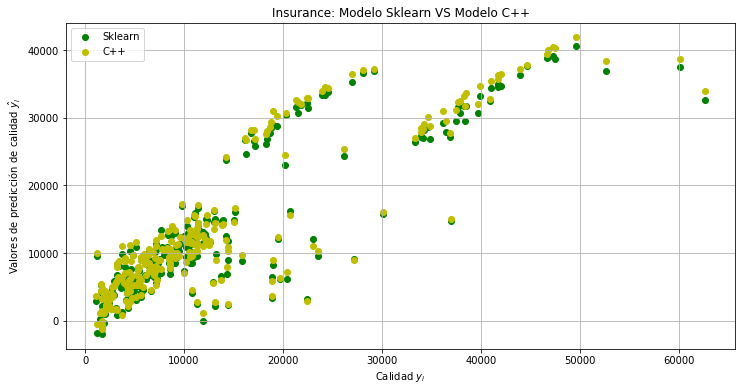

In [51]:
# The graphs of predictions between the C++ model and
# the Sklearn model
fig, axes = plt.subplots(figsize=(12, 6))
plt.scatter(y_test, y_test_hat_SK, c='g', label='Sklearn')
plt.scatter(y_test, y_hatCpp_test, c='y', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Insurance: Modelo Sklearn VS Modelo C++')
plt.xlabel('Calidad $y_i$')
plt.ylabel('Valores de predicción de calidad $\hat{y_i}$')
plt.show()

In [52]:
# Extract performance metrics
r2Sk = r2_score(y_test, y_test_hat_SK)
r2Cpp = r2_score(y_test, y_hatCpp_test)
print(f"Métrica de rendimiento SK (r2_score) {r2Sk}")
print(f"Métrica de rendimiento C++ (r2_score) {r2Cpp}")

Métrica de rendimiento SK (r2_score) 0.7580723949522936
Métrica de rendimiento C++ (r2_score) 0.76238595535912


#Performance in C++

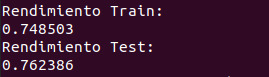

In [53]:
#YOU CAN SEE THAT BOTH RESULTS ARE VERY SIMILAR, BETWEEN SK AND C++

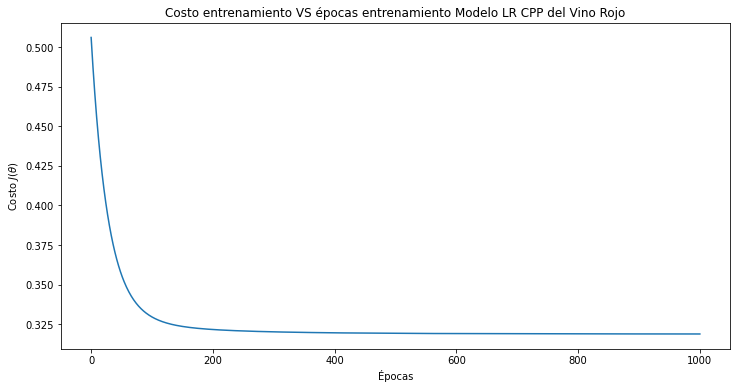

In [54]:
# The cost function is presented
plt.figure(figsize=(12, 6))
plt.plot(costoCpp)
plt.title('Costo entrenamiento VS épocas entrenamiento Modelo LR CPP del Vino Rojo')
plt.ylabel(r'Costo $J(\theta)$')
plt.xlabel('Épocas')
plt.show()

Basado en este resultado de ambos modelos, es evidente que el modelo tiene una precisión del 75% para el módelo SKlearn y un 74% para el módelo C++. Para ser un modelo predictivo comienza a ser confiable desde el analisis númerico, ya que es un buen número y hay altas probabilidades de acierto, sin embargo, al aplicarlo en un campo de la vida real, es debido pensarlo dos vecessi se desea confiar en el módelo, ya no es cuestión de números, pueden ser vida si hablamos del sector salud. En esta oportunidad se evalua el modelo con la metrica de r2 que nos proprciona skit-learn y nos arroja el resultado de un 75% de precisión. Confirmamos el grado de precisión el cuál es bueno, pero podría ser mejor, sin embargo el punto a rescatar es la implementación de estos ódelos, donde se entrenaron y se pusieron a prueba, en dos formas distintas bajo calculos estadisticos y el aprendizaje fue optimo. Agradezco al educador encargado, por proporcionarns dichos conocimientos.